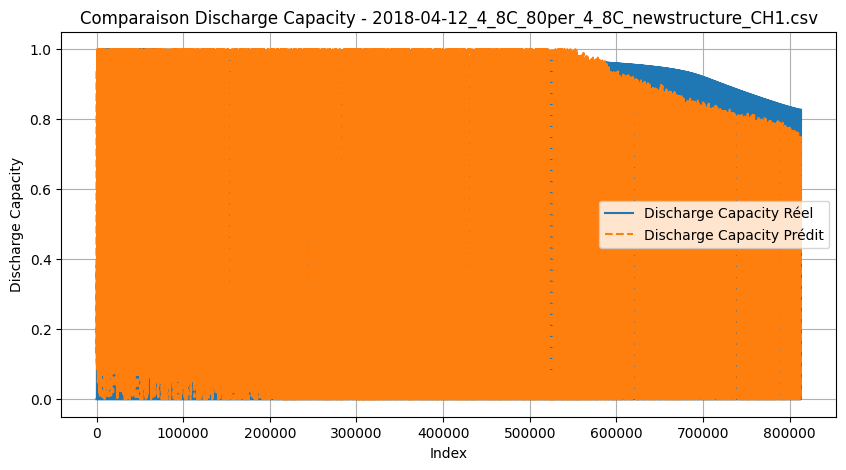

C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


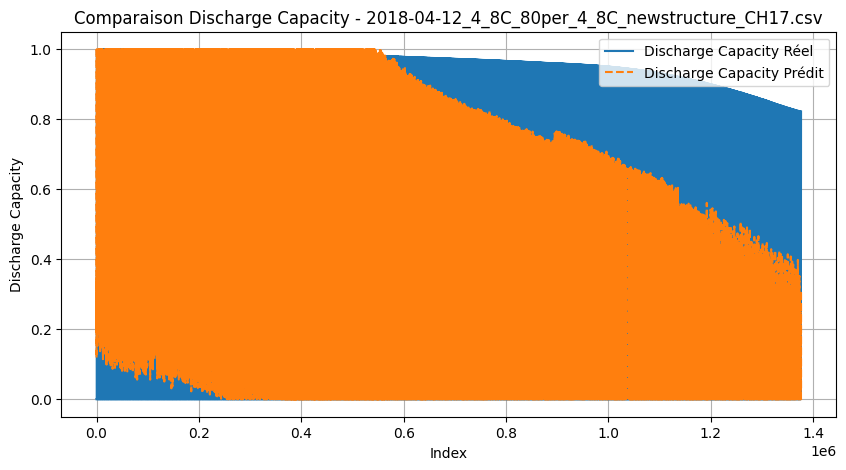

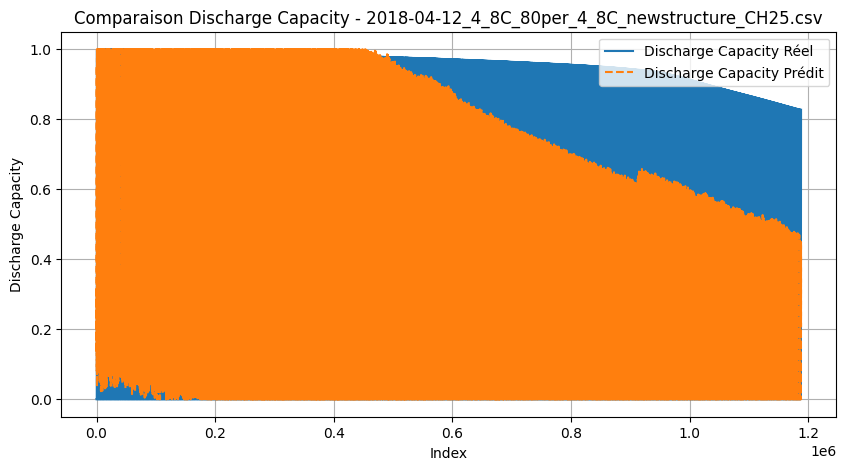

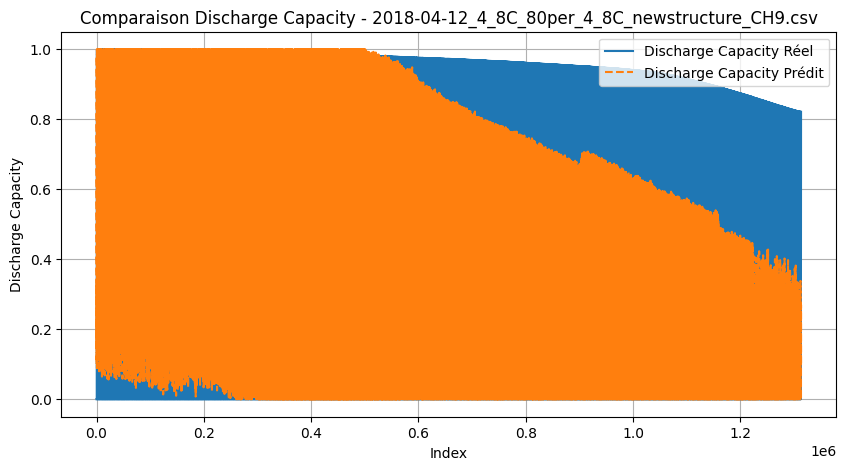

MSE moyen sur l'ensemble d'entraînement: 0.022530259444485137
MSE moyen sur l'ensemble de test: 0.05521036314662512


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Chemin vers le répertoire contenant les fichiers CSV
data_path = r'C:\\Users\\pc\\Desktop\\data\\all batchs'

# Lister tous  fichiers CSV dans le répertoire donné
csv_files = [f for f in os.listdir(data_path) if f.endswith('.csv')]

# Initialiser les listes pour stocker les résultats de la régression
train_mse_list = []
test_mse_list = []

# Sélectionner les fichiers pour l'entraînement et le test
train_files = csv_files[:12]  # Les 12 premiers fichiers pour l'entraînement
test_files = csv_files[12:]   # Les 5 derniers fichiers pour le test

# Entraîner le modèle sur les fichiers d'entraînement
for csv_file in train_files:
    file_path = os.path.join(data_path, csv_file)
    df = pd.read_csv(file_path)
    
    X_train = df.drop(columns=['Discharge_Capacity'])
    y_train = df['Discharge_Capacity']
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Prédire sur l'ensemble d'entraînement
    y_train_pred = model.predict(X_train)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_mse_list.append(train_mse)

# Tester le modèle sur les fichiers de test
for csv_file in test_files:
    file_path = os.path.join(data_path, csv_file)
    df = pd.read_csv(file_path)
    
    X_test = df.drop(columns=['Discharge_Capacity'])
    y_test = df['Discharge_Capacity']
    
    # Prédire sur l'ensemble de test
    y_test_pred = model.predict(X_test)
    
    # Contraindre les prédictions à être dans l'intervalle [0, 1]
    y_test_pred = np.clip(y_test_pred, 0, 1)
    
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_mse_list.append(test_mse)
    
    # Tracer le graphique pour comparer les valeurs réelles et prédites
    plt.figure(figsize=(10, 5))
    plt.plot(y_test.values, label='Discharge Capacity Réel')
    plt.plot(y_test_pred, label='Discharge Capacity Prédit', linestyle='--')
    plt.xlabel('Index')
    plt.ylabel('Discharge Capacity')
    plt.title(f'Comparaison Discharge Capacity - {csv_file}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Afficher les MSE moyens pour l'entraînement et le test
print(f'MSE moyen sur l\'ensemble d\'entraînement: {sum(train_mse_list)/len(train_mse_list)}')
print(f'MSE moyen sur l\'ensemble de test: {sum(test_mse_list)/len(test_mse_list)}')


C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\core.py:158: UserWarning: [00:56:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Fichier de test: 2018-04-12_4_8C_80per_4_8C_newstructure_CH1.csv
Mean Squared Error (MSE): 0.006744831941162265
Mean Absolute Error (MAE): 0.02405737182022207
R-squared (R²): 0.9546868433594954


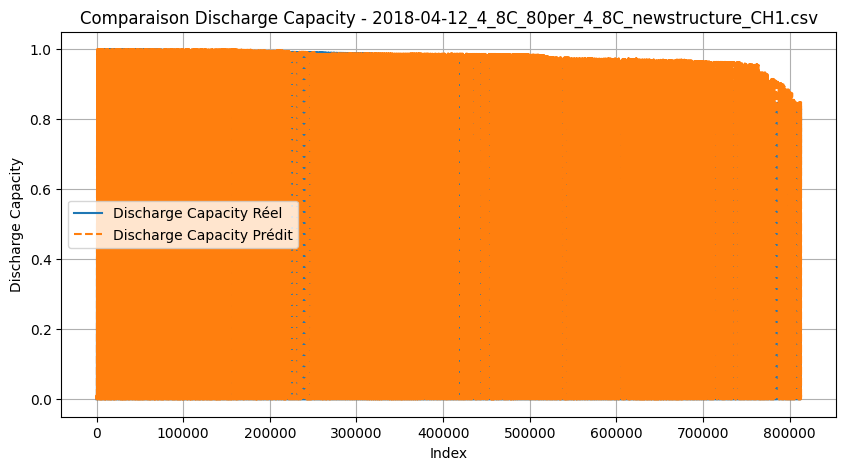

Fichier de test: 2018-04-12_4_8C_80per_4_8C_newstructure_CH17.csv
Mean Squared Error (MSE): 0.004249568876050906
Mean Absolute Error (MAE): 0.019067931294942546
R-squared (R²): 0.971031830514791


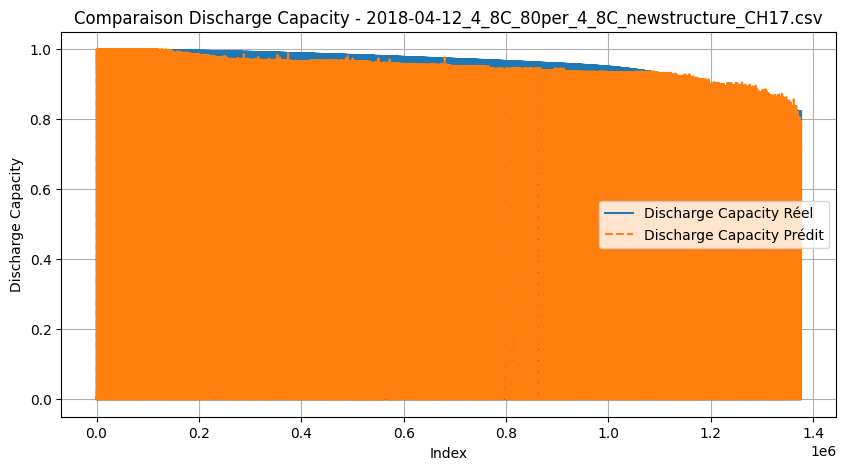

Fichier de test: 2018-04-12_4_8C_80per_4_8C_newstructure_CH25.csv
Mean Squared Error (MSE): 0.007452583144414345
Mean Absolute Error (MAE): 0.030236447331500983
R-squared (R²): 0.9474926963824458


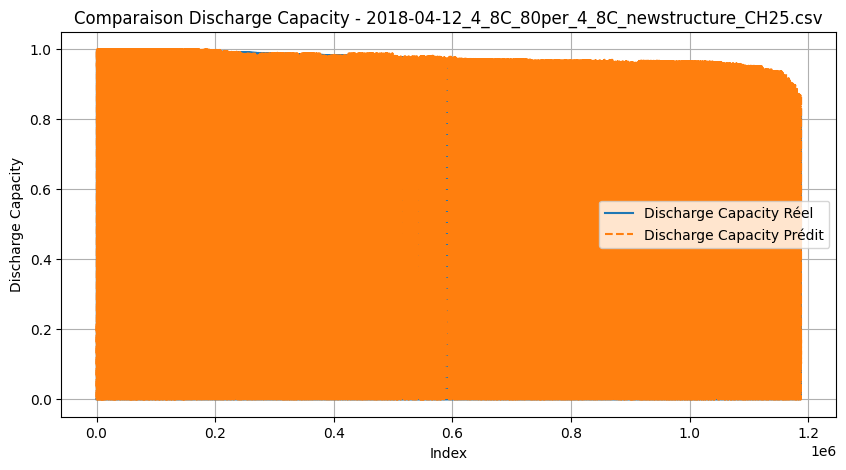

Fichier de test: 2018-04-12_4_8C_80per_4_8C_newstructure_CH9.csv
Mean Squared Error (MSE): 0.0059149692849699426
Mean Absolute Error (MAE): 0.022774187977359063
R-squared (R²): 0.9583785475051937


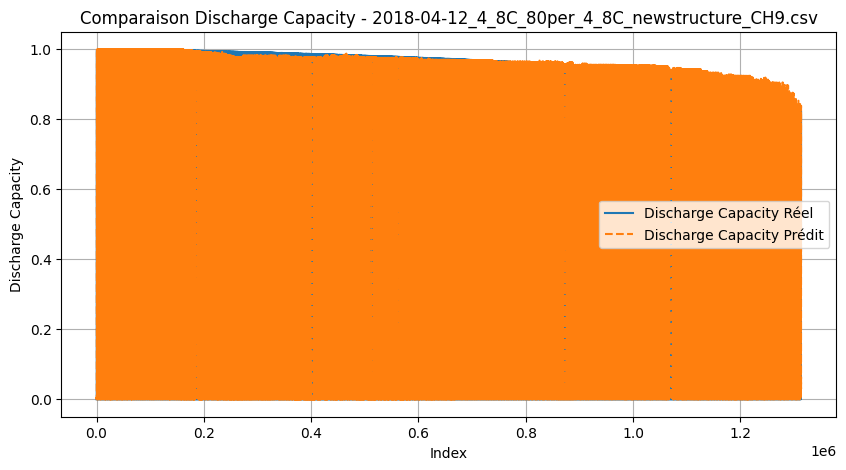

In [8]:
import os
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Chemin vers le répertoire contenant les fichiers CSV
data_path = r'C:\\Users\\pc\\Desktop\\data\\all batchs'

# Lister tous les fichiers CSV dans le répertoire donné
csv_files = [f for f in os.listdir(data_path) if f.endswith('.csv')]

# Sélectionner les fichiers pour l'entraînement et le test
train_files = csv_files[:12]  # Les 12 premiers fichiers pour l'entraînement
test_files = csv_files[12:]   # Les 5 derniers fichiers pour le test

# Initialiser les ensembles de données d'entraînement
X_train_total = []
y_train_total = []

# Préparer les données d'entraînement
for csv_file in train_files:
    file_path = os.path.join(data_path, csv_file)
    df = pd.read_csv(file_path)
    X = df.drop(columns=['Discharge_Capacity'])
    y = df['Discharge_Capacity']
    X_train_total.append(X)
    y_train_total.append(y)

# Concaténer les données d'entraînement
X_train = pd.concat(X_train_total, axis=0)
y_train = pd.concat(y_train_total, axis=0)

# Convertir en matrices DMatrix de XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)

# Définir les paramètres du modèle
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'learning_rate': 0.1,
    'max_depth': 6,
    'alpha': 10,
    'n_estimators': 100
}

# Entraîner le modèle
model = xgb.train(params, dtrain, num_boost_round=100)

# Tester le modèle sur chaque fichier de test
for csv_file in test_files:
    file_path = os.path.join(data_path, csv_file)
    df = pd.read_csv(file_path)
    X_test = df.drop(columns=['Discharge_Capacity'])
    y_test = df['Discharge_Capacity']
    
    # Convertir en matrice DMatrix de XGBoost
    dtest = xgb.DMatrix(X_test, label=y_test)
    
    # Faire des prédictions
    y_pred = model.predict(dtest)
    
    # Limiter les prédictions entre 0 et 1
    y_pred = np.clip(y_pred, 0, 1)
    
    # Convertir y_test en DataFrame pour aligner les indices
    y_test_df = pd.DataFrame(y_test).reset_index(drop=True)

    # Calculer les métriques
    mse = mean_squared_error(y_test_df, y_pred)
    mae = mean_absolute_error(y_test_df, y_pred)
    r2 = r2_score(y_test_df, y_pred)

    # Afficher les résultats
    print(f"Fichier de test: {csv_file}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"R-squared (R²): {r2}")
    
    # Tracer le graphique pour comparer les valeurs réelles et prédites
    plt.figure(figsize=(10, 5))
    plt.plot(y_test_df, label='Discharge Capacity Réel')
    plt.plot(y_pred, label='Discharge Capacity Prédit', linestyle='--')
    plt.xlabel('Index')
    plt.ylabel('Discharge Capacity')
    plt.title(f'Comparaison Discharge Capacity - {csv_file}')
    plt.legend()
    plt.grid(True)
    plt.show()


C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\core.py:158: UserWarning: [15:48:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


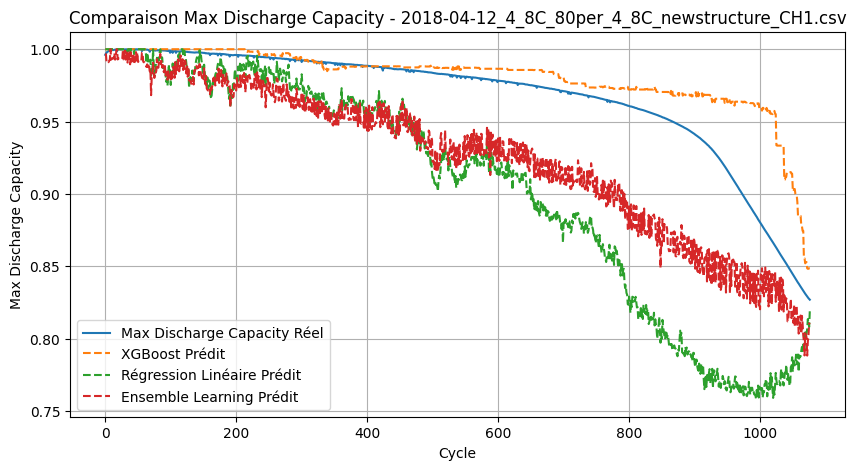

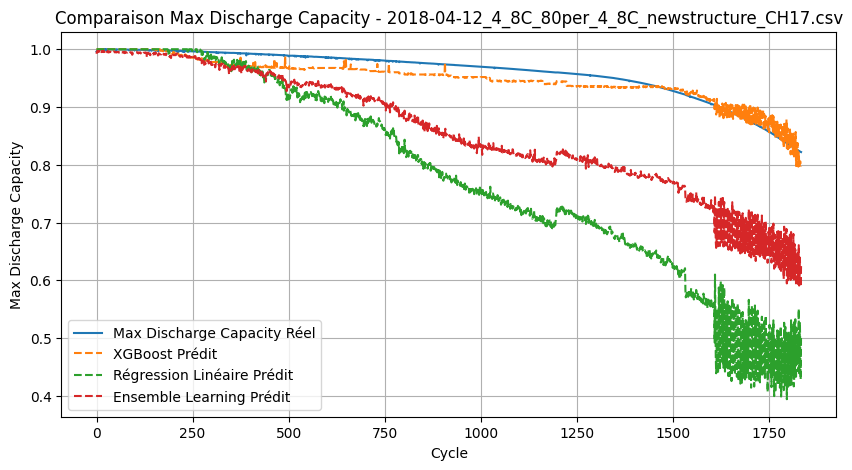

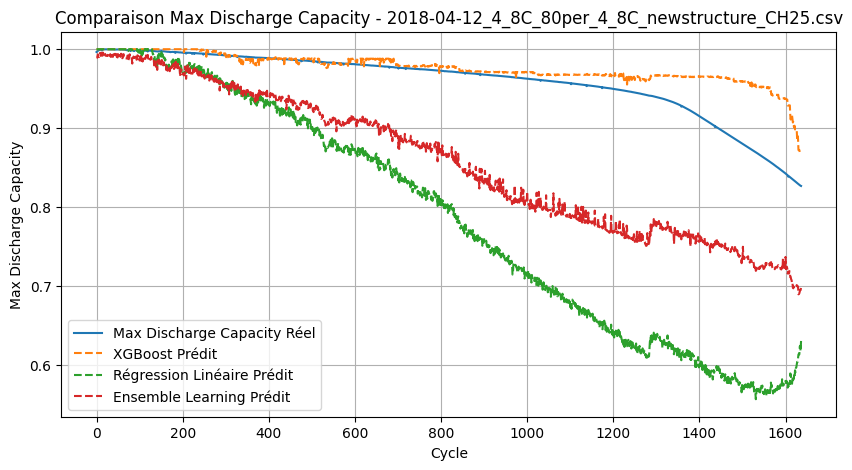

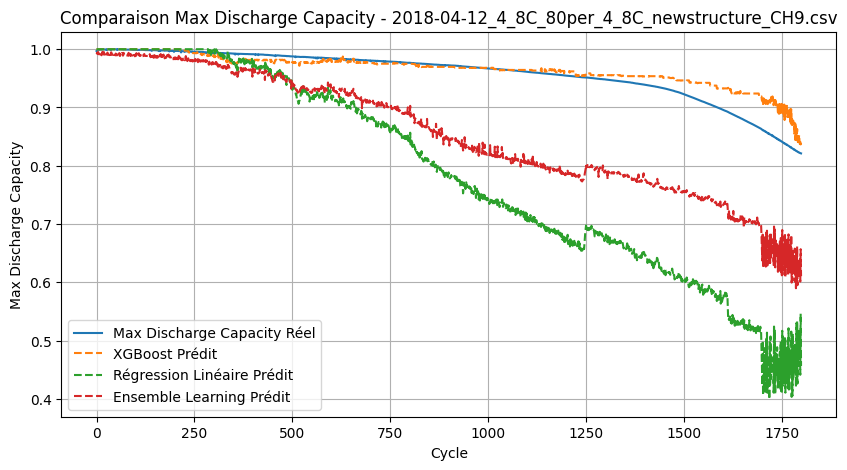

MSE moyen pour XGBoost: 0.006090488311649364
MSE moyen pour Régression Linéaire: 0.04703773210017635
MSE moyen pour Ensemble Learning: 0.016178782912434353


In [3]:
import os
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Chemin vers le répertoire contenant les fichiers CSV
data_path = r'C:\\Users\\pc\\Desktop\\data\\all batchs'

# Lister tous les fichiers CSV dans le répertoire donné
csv_files = [f for f in os.listdir(data_path) if f.endswith('.csv')]

# Sélectionner les fichiers pour l'entraînement et le test
train_files = csv_files[:12]  # Les 12 premiers fichiers pour l'entraînement
test_files = csv_files[12:]   # Les 5 derniers fichiers pour le test

# Initialiser les modèles
linear_model = LinearRegression()
xgb_model = None

# Initialiser les listes pour stocker les MSE
mse_xgb_list = []
mse_linear_list = []
mse_ensemble_list = []

# Entraîner les modèles sur l'ensemble des données d'entraînement
X_train_total = []
y_train_total = []

for csv_file in train_files:
    file_path = os.path.join(data_path, csv_file)
    df = pd.read_csv(file_path)
    X = df.drop(columns=['Discharge_Capacity'])
    y = df['Discharge_Capacity']
    X_train_total.append(X)
    y_train_total.append(y)

# Concaténer les données d'entraînement
X_train = pd.concat(X_train_total, axis=0)
y_train = pd.concat(y_train_total, axis=0)

# Entraîner le modèle XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'learning_rate': 0.1,
    'max_depth': 6,
    'alpha': 10,
    'n_estimators': 100
}
xgb_model = xgb.train(params, dtrain, num_boost_round=100)

# Entraîner le modèle de régression linéaire
linear_model.fit(X_train, y_train)

# Tester les modèles sur chaque fichier de test individuellement
for csv_file in test_files:
    file_path = os.path.join(data_path, csv_file)
    df = pd.read_csv(file_path)
    
    # S'assurer que la colonne 'Cycle_Index' est présente pour grouper par cycle
    if 'Cycle_Index' not in df.columns:
        raise ValueError(f"'Cycle_Index' is required in {csv_file} for max discharge capacity per cycle.")
    
    X_test = df.drop(columns=['Discharge_Capacity'])
    y_test = df['Discharge_Capacity']
    cycle_index = df['Cycle_Index']
    
    # Prédictions XGBoost
    dtest = xgb.DMatrix(X_test)
    xgb_pred = xgb_model.predict(dtest)
    xgb_pred = np.clip(xgb_pred, 0, 1)  # Limiter entre 0 et 1
    mse_xgb = mean_squared_error(y_test, xgb_pred)
    mse_xgb_list.append(mse_xgb)

    # Prédictions Régression Linéaire
    linear_pred = linear_model.predict(X_test)
    linear_pred = np.clip(linear_pred, 0, 1)  # Limiter entre 0 et 1
    mse_linear = mean_squared_error(y_test, linear_pred)
    mse_linear_list.append(mse_linear)

    # Prédictions Ensemble Learning (moyenne des deux)
    ensemble_pred = (xgb_pred + linear_pred) / 2
    mse_ensemble = mean_squared_error(y_test, ensemble_pred)
    mse_ensemble_list.append(mse_ensemble)

    # Calculer le max discharge capacity par cycle pour les valeurs réelles et prédites
    y_test_max_per_cycle = y_test.groupby(cycle_index).max()
    xgb_pred_max_per_cycle = pd.Series(xgb_pred).groupby(cycle_index).max()
    linear_pred_max_per_cycle = pd.Series(linear_pred).groupby(cycle_index).max()
    ensemble_pred_max_per_cycle = pd.Series(ensemble_pred).groupby(cycle_index).max()

    # Afficher les graphes pour chaque fichier
    plt.figure(figsize=(10, 5))
    plt.plot(y_test_max_per_cycle.values, label='Max Discharge Capacity Réel')
    plt.plot(xgb_pred_max_per_cycle.values, label='XGBoost Prédit', linestyle='--')
    plt.plot(linear_pred_max_per_cycle.values, label='Régression Linéaire Prédit', linestyle='--')
    plt.plot(ensemble_pred_max_per_cycle.values, label='Ensemble Learning Prédit', linestyle='--')
    plt.xlabel('Cycle')
    plt.ylabel('Max Discharge Capacity')
    plt.title(f'Comparaison Max Discharge Capacity - {csv_file}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Afficher les MSE moyens
print(f"MSE moyen pour XGBoost: {np.mean(mse_xgb_list)}")
print(f"MSE moyen pour Régression Linéaire: {np.mean(mse_linear_list)}")
print(f"MSE moyen pour Ensemble Learning: {np.mean(mse_ensemble_list)}")
